<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Tipología y ciclo de vida de los datos · Práctica 1</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Mauricio Mosquera Sánchez


# Práctica 1: Web scraping

El objetivo de esta actividad será la creación de un dataset a partir de los datos contenidos en una web. Para su realización, se deben cumplir los siguientes puntos:


1. Contexto. Explicar en qué contexto se ha recolectado la información. Explique por qué el sitio web elegido proporciona dicha información.

    La epidemia de covid-19 fue declarada por la OMS una emergencia de salud pública de preocupación internacional el 30 de enero de 2020. El Director General de la Organización Mundial de la Salud (OMS), el doctor Tedros Adhanom Ghebreyesus, anunció el 11 de marzo de 2020 que la nueva enfermedad por el coronavirus 2019 (covid-19) puede caracterizarse como una pandemia. La caracterización de pandemia significa que la epidemia se ha extendido por varios países, continentes o todo el mundo, y que afecta a un gran número de personas. Por lo tanto, la informacion se recolectó con el propósito de conocer las estadisticas de la pandemia por covid-19 en el mundo. 

2. Definir un título para el dataset. Elegir un título que sea descriptivo.

    Casos, fallecidos y recuperados por COVID-19 en el mundo. 

3. Descripción del dataset. Desarrollar una descripción breve del conjunto de datos que se ha extraído (es necesario que esta descripción tenga sentido con el título elegido).

    El dataset esta en formato (.csv) con el nombre de covid-19, los datos se almacenan en una tabla que consta de 10 columnas (variables) y 218 filas (países); 9 de 10 variables son de tipo numéricas. 

4. Representación gráfica. Presentar una imagen o esquema que identifique el dataset visualmente

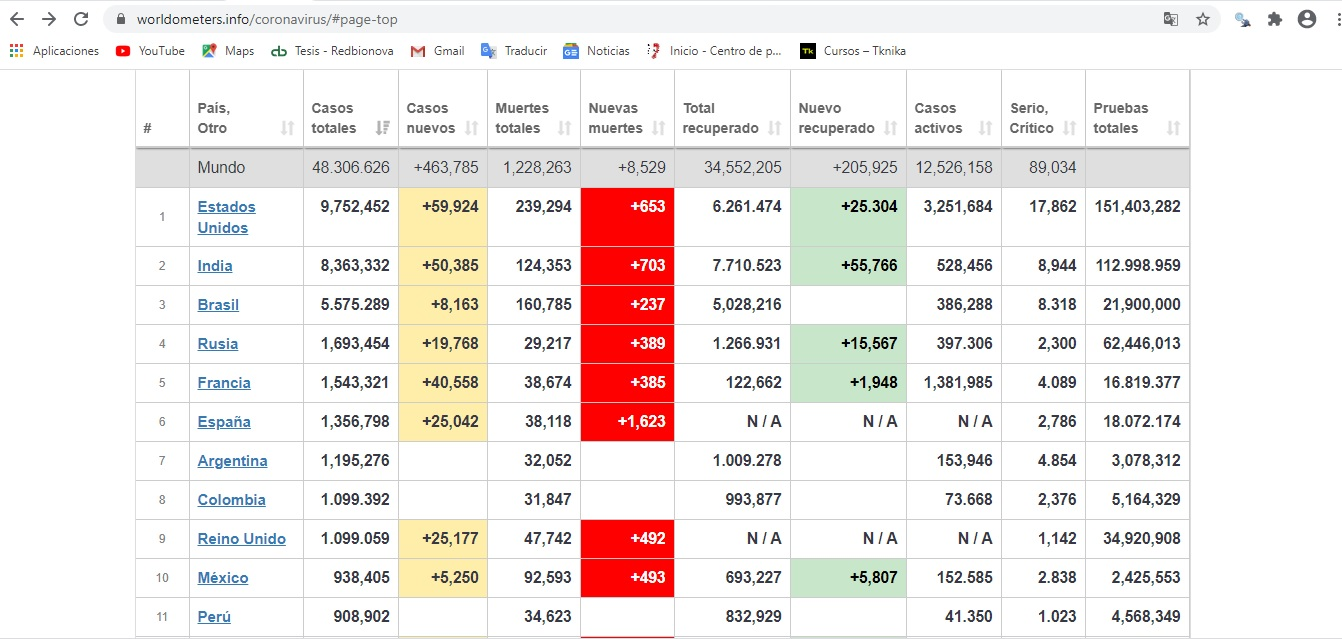

5. Contenido. Explicar los campos que incluye el dataset, el periodo de tiempo de los datos y cómo se ha recogido
    
    Los datos son extraídos en tiempo real del Worldometer, un proveedor de estadísticas globales de COVID-19 quien se encarga de recopilar datos de informes oficiales, directamente de los canales de comunicación del gobierno o indirectamente, a través de fuentes de medios locales cuando se considera confiable. El dataset esta compuesto por los siguientes campos que datallo a continuación:
    
    
    1. Países, nombre de los países 
    2. Casos totales, números totales de casos contagiados 
    3. Casos nuevos, números nuevos de casos contagiados
    4. Fallecidos totales, números totales de personas fallecidas
    5. Fallecidos nuevos, números nuevos de personas fallecidas
    6. Recuperados totales, números totales de personas recuperadas
    7. Recuperados nuevos, números nuevos de personas recuperadas
    8. Casos activos, número de personas con la infección activa
    9. Estado crítico, número de personas en estado crítico
    10. Pruebas totales, número de pruebas realizadas por PCR para confirmar la infección

6. Agradecimientos. Presentar al propietario del conjunto de datos. Es necesario incluir citas de investigación o análisis anteriores (si los hay).

    Esta información pertenece a la recopilación de conocimientos realizado por Worldometer, quienes han sido citados como fuente en  más de 10000 libros publicados y en más de 6000 artículos de revistas profesionales y que fueron votado como uno de los mejores sitios web de referencia gratuita por la American Library Association (ALA), la asociación de bibliotecas más antigua y más grande del mundo.
    
    https://www.worldometers.info/coronavirus/#page-top

7. Inspiración. Explique por qué es interesante este conjunto de datos y qué preguntas se pretenden responder.

    Este conjunto de datos es importante ya que nos permite conocer la real situación de la pandemia por covid-19 en el mundo. Los datos actualizados nos permitiran realizar un análisis estadístico con un procesamiento fiable, rápido y eficiente que nos permitiran adoptar en forma directa o indirecta de medidas orientadas a la reducción del número de contagios.    


8. Licencia. Seleccione una de estas licencias para su dataset y explique el motivo de su selección:

    Debido a que los conjuntos de datos o bases de datos pueden constituir un activo de gran valor a quienes hacen investigación, he decidido utilizar la licencia MIT que se detallada a continuación:  
        
    
    Licencia MIT

    Copyright (c) 2020 Mauricio Mosquera

    Por la presente se otorga permiso, sin cargo, a cualquier persona que obtenga una copia de este software y los archivos de documentación asociados (el "Software"), para tratar en el Software sin restricciones, incluidos, entre otros, los derechos usar, copiar, modificar, fusionar, publicar, distribuir, sublicenciar y / o vender copias del Software y para permitir a las personas a las que se amueblado para ello, sujeto a las siguientes condiciones:

    El aviso de derechos de autor anterior y este aviso de permiso se incluirán en todos copias o partes sustanciales del Software.

    EL SOFTWARE SE PROPORCIONA "TAL CUAL", SIN GARANTÍA DE NINGÚN TIPO, EXPRESA O IMPLÍCITAS, INCLUIDAS PERO NO LIMITADAS A LAS GARANTÍAS DE COMERCIABILIDAD, APTITUD PARA UN PROPÓSITO PARTICULAR Y NO INFRACCIÓN. EN NINGÚN CASO LOS AUTORES O TITULARES DE LOS DERECHOS DE AUTOR SERÁN RESPONSABLES DE CUALQUIER RECLAMO, DAÑOS U OTROS RESPONSABILIDAD, YA SEA EN UNA ACCIÓN DE CONTRATO, AGRAVIO O DE OTRO MODO, QUE SURJA DE, FUERA O EN RELACIÓN CON EL SOFTWARE O EL USO U OTROS NEGOCIOS EN EL SOFTWARE.

9. Código. Adjuntar el código con el que se ha generado el dataset, preferiblemente en Python o, alternativamente, en R.

    El código Web scraping para la extracción de datos es el siguiente:    

In [1]:
# Cargamos las librerias a utilizar

import requests
import urllib.request
import pandas as pd
import numpy as np
import re
import csv
from bs4 import BeautifulSoup

# Extraemos los datos y los guardarmos en formato (.csv)

url = 'https://www.worldometers.info/coronavirus/#page-top'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tabla = soup.find_all('table', attrs={'id': 'main_table_countries_today'})[0]
values =[]
tr = tabla.find_all(['tr'])

csvFile = open("covid-19.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()
    
df = pd.read_csv("covid-19.csv")
df.shape

(234, 19)

In [2]:
# Eliminanos filas y columnas que no necesitamos

df = df.drop(['#','Population','Continent','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl','Deaths/1M pop','Tests/\n1M pop'], axis=1)
df = df.drop(df.columns[[9]], axis=1)
df = df.drop(range(0, 8, 1), axis=0)
df = df.drop(range(226,234,1), axis=0)

In [3]:
# Renombramos las variables

df = df.rename(columns = {"Country,Other":"Paises","TotalCases":"Casos Totales","NewCases":"Casos Nuevos","TotalDeaths":"Fallecidos Totales","NewDeaths":"Fallecidos Nuevos","TotalRecovered":"Recuperados Totales","NewRecovered":"Recuperados Nuevos","ActiveCases":"Casos Activos","Serious,Critical":"Estado Critico","TotalTests":"Pruebas Totales"})
df = df.fillna(" ")

In [4]:
# Limpieza y manipulación de datos

df['Casos Totales']=df['Casos Totales'].str.lstrip('+').str.replace(',', '')
df['Casos Nuevos']=df['Casos Nuevos'].str.lstrip('+').str.replace(',', '')
df['Fallecidos Totales']=df['Fallecidos Totales'].str.lstrip('+').str.replace(',', '')
df['Fallecidos Nuevos']=df['Fallecidos Nuevos'].str.lstrip('+').str.replace(',', '')
df['Recuperados Totales']=df['Recuperados Totales'].str.lstrip('+').str.replace(',', '')
df['Recuperados Nuevos']=df['Recuperados Nuevos'].str.lstrip('+').str.replace(',', '')
df['Casos Activos']=df['Casos Activos'].str.lstrip('+').str.replace(',', '')
df['Estado Critico']=df['Estado Critico'].str.lstrip('+').str.replace(',', '')
df['Pruebas Totales']=df['Pruebas Totales'].str.lstrip('+').str.replace(',', '')

In [5]:
df['Casos Totales']=pd.to_numeric(df['Casos Totales'],errors='coerce')
df['Casos Nuevos']=pd.to_numeric(df['Casos Nuevos'],errors='coerce')
df['Fallecidos Totales']=pd.to_numeric(df['Fallecidos Totales'],errors='coerce')
df['Fallecidos Nuevos']=pd.to_numeric(df['Fallecidos Nuevos'],errors='coerce')
df['Recuperados Totales']=pd.to_numeric(df['Recuperados Totales'],errors='coerce')
df['Recuperados Nuevos']=pd.to_numeric(df['Recuperados Nuevos'],errors='coerce')
df['Casos Activos']=pd.to_numeric(df['Casos Activos'],errors='coerce')
df['Estado Critico']=pd.to_numeric(df['Estado Critico'],errors='coerce')
df['Pruebas Totales']=pd.to_numeric(df['Pruebas Totales'],errors='coerce')

In [6]:
# Guardamos los cambios realizados

df = df.sort_values(by = 'Casos Totales',ascending=False)
df.to_csv("covid-19.csv", encoding="utf-8")
df[0:10]

,Paises,Casos Totales,Casos Nuevos,Fallecidos Totales,Fallecidos Nuevos,Recuperados Totales,Recuperados Nuevos,Casos Activos,Estado Critico,Pruebas Totales
8,USA,10384463,88196.0,244241.0,434.0,6531473.0,47090.0,3608749.0,18623.0,158945546.0
9,India,8591075,37211.0,127104.0,451.0,7957206.0,41546.0,506765.0,8944.0,118572192.0
10,Brazil,5675032,10917.0,162628.0,231.0,5064344.0,NaN,448060.0,8318.0,21900000.0
11,France,1807479,20155.0,40987.0,548.0,129735.0,1121.0,1636757.0,4690.0,18120790.0
12,Russia,1796132,21798.0,30793.0,256.0,1335141.0,10722.0,430198.0,2300.0,65209357.0
13,Spain,1426602,18340.0,39345.0,170.0,NaN,NaN,NaN,3007.0,19394289.0
14,Argentina,1242182,NaN,33560.0,NaN,1062911.0,NaN,145711.0,4608.0,3228651.0
15,UK,1213363,21350.0,49238.0,194.0,NaN,NaN,NaN,1185.0,36567555.0
16,Colombia,1143887,NaN,32791.0,NaN,1038082.0,NaN,73014.0,2376.0,5402433.0
17,Mexico,967825,5887.0,95027.0,219.0,715977.0,5037.0,156821.0,2838.0,2511207.0


10. Dataset. Publicación del dataset en formato CSV en Zenodo (obtención del DOI) con una breve descripción.

    Con fecha 09/11/20, se ha creado un identificador de objetos digitales que permite la identificación única de nuestro contenido electrónico, en enlace es el siguiente: 
    
    DOI: https://doi.org/10.5281/zenodo.4265059
    
    Wiki: https://github.com/mao195/Mauricio

## Recursos

Los siguientes recursos son de utilidad para la realización de la práctica:


    ● Subirats, L., Calvo, M. (2018). Web Scraping. Editorial UOC.
    ● Masip, D. El lenguaje Python. Editorial UOC.
    ● Lawson, R. (2015). Web Scraping with Python. Packt Publishing Ltd. Chapter 2. Scraping the Data.
    ● Simon Munzert, Christian Rubba, Peter Meißner, Dominic Nyhuis. (2015). Automated Data Collection with R: A Practical Guide to Web Scraping and Text Mining. John Wiley & Sons.
    ● Tutorial de Github https://guides.github.com/activities/hello-world. 
    